# Monte Carlo simulation

In [1]:
#!pip install symbulate
from symbulate import *
#'exec(%matplotlib inline)' 
import matplotlib
import pandas_datareader as pdr
import numpy as np
import math

import matplotlib.pyplot as plt

# 2.2.1 Simulating numbers with the UNIFORM probability distribution

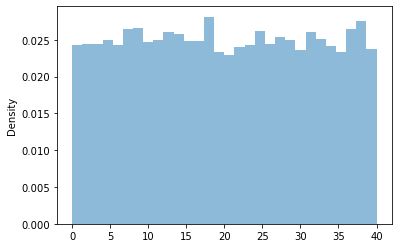

In [2]:
# clear the plot space:
plt.clf()
# Define the probability type of function as uniform (probability space)
P = Uniform(0,40)
# Define X as a random variable of the type P (uniform)
X =RV(P)
# Simulate the values of X and save the in the x array: 
x=X.sim(10000)
x.plot()
plt.show()

# 2.2.2 CHALLENGE
A. Calculate the mean and standar deviation of this simulated uniform x variable. How close where these mean and standard deviation from the theoreticla mean and standard deviation?

In [3]:
# Calculating the theoretical mean and standard deviation
x_mean_theoretical = (0 + 40)/2
x_std_theoretical = math.sqrt((40 - 0)**2/12)
print('Theoretical')
print(f'Mean: {x_mean_theoretical} Std: {x_std_theoretical}')
print('Simulated')
print(f'Mean: {x.mean()} Std: {x.std()}')

Theoretical
Mean: 20.0 Std: 11.547005383792516
Simulated
Mean: 20.011135198444308 Std: 11.538115121837953


IT IS NOT EXACTLY THE SAME RESULT, BUT BOTH, THE THEORETICAL AND SIMULATED VALUES ARE CLOSE TO EACH OTHER. 
THE DIFFERENCE OCCURS DUE TO THE RANDOM PROCESSES IN THIS SIMULATION.

B. Interpret the above histogram, what do you see? Explain with your words.
THE HISTOGRAM REPRESENTS A UNIFORM DISTRIBUTION, WHICH MEANS THAT ALL OUTCOMES (NUMBERS FROM 0 - 40) ARE EQUALLY LIKELY. IT LOOKS APROXIMATELY LIKE A RECTANGLE, WHERE THE BASE IS 40 AND THE HEIGHT APPROXIMATELY 0.025

Now generate 10,000 groups of 25 uniform random variables to end up in a matrix of 10,000 rows and 25 columns:

In [4]:
# Define the probability space as a vector of 25 uniform random numbers:
P = Uniform(0,40) ** 25
# Define XVECTOR as a vector of random variables with 25 random values 
XVECTOR =RV(P)
# Simulate 10,000 vectors to get a matrix  
xmatrix=XVECTOR.sim(10000)

Now xmatrix will have 10,000 rows and 25 columns of uniform random numbers between 0 and 40:

In [5]:
xmatrix

0,"(20.848065479587916, 15.35070544699606, 0.40123977660517784, 22.419404772397037, 27.78626538147435, ..."
1,"(15.630654417171833, 20.07286898147933, 4.2806547913753334, 38.54960027275739, 35.85056654021877, ....."
2,"(30.516479322551678, 3.759990873165937, 39.15899419612761, 8.212115926601204, 4.571101779976057, ......"
3,"(34.37459916328417, 39.12718091355107, 4.117013767472311, 0.1332772548175054, 35.49736359569864, ......"
4,"(34.31934915837114, 31.684906673294165, 15.719168424756456, 12.891214254515585, 20.603089491167026, ..."
5,"(20.734296677980588, 34.7229146511715, 15.627324452323283, 7.711264268293334, 28.43704834237533, ......"
6,"(12.099900991057337, 25.090742805497506, 22.157211656960236, 15.967544289670407, 6.102049192268635, ..."
7,"(32.990626273115815, 1.4457702004953088, 30.135704913119223, 5.031917477473522, 22.023632916421416, ..."
8,"(39.458418656865305, 20.903688852801245, 33.68886066245712, 34.74074427003062, 2.808322280071689, ....."
...,...
9999,"(31.695200603148162, 22.10115703377467, 8.053740269313021, 22.50516840416395, 12.832712262519115, ....."


Now we get the mean of each row, so we end up with 10,000 sample means:

In [6]:
# The 2nd parameter is the mathematical operation applied to each row of the random vector
# Simulate 10,000 means of each random vector of 25 uniform distributed numbers: 
xmean = RV(P,mean).sim(10000)
xmean

0,16.890929521386443
1,24.332900109526594
2,21.33367736996289
3,19.2158082431123
4,18.889530382777263
5,18.876257247918062
6,21.325440570885977
7,22.82844852124383
8,22.856314104070325
...,...
9999,20.92255009858915


Now do a histogram of these sample means that come from a UNIFORM distribution.

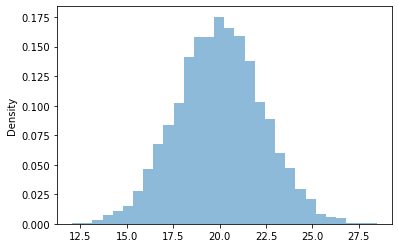

In [7]:
plt.clf()
xmean.plot()
plt.show()

# 2.2.3 CHALLENGE
A. Calculate the mean and standard deviation of the xmean variable. How similar or different are these values from the mean and standar deviation of x?

In [8]:
print('X')
print(f'Mean: {x.mean()} Std: {x.std()}')
print('xmean')
print(f'Mean: {xmean.mean()} Std: {xmean.std()}')

X
Mean: 20.011135198444308 Std: 11.538115121837953
xmean
Mean: 19.992974398946274 Std: 2.305288745650924


WE CAN CLEARLY REALIZE THAT THERE IS BASICALLY NO DIFFERENCE BETWEEN THE MEAN, THE MAIN DIFFERENCE IS BETWEEN THE STANDARD DEVIATIONS. THIS IS CAUSED BECAUSE OF THE AGGREGATION OF EACH GROUP BY ITS MEAN.

B. What do you see in the above histogram? Does the histogram of sample means of uniform random variable look like a uniform distributed variable? Do you see a logic? Briefly explain what you think. 

NO, THE HISTOGRAM LOOKS LIKE A NORMAL DISTRIBUTION AND THIS HAPPENS BEACUSE WE ARE PLOTTING THE MEAN OF THE GROUPS, WHICH MAKES VALUES CLOSER TO THE OVERALL MEAN.

Now plot both variables in the same plot; the original x uniform variable and the xsample variable (the sample means of x).

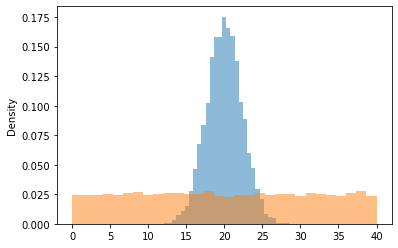

In [9]:
plt.clf()
xmean.plot()
x.plot()
plt.show()

C. What do you see? How the histogram of x differs from the histogram of the sample of x?
THE BLUE HISTOGRAM REPRESENTS A NORMAL DISTRIBUTION (BELL-SHAPED), MEANWHILE THE ORANGE HISTOGRAM REPRESENTS A UNIFORM DISTRIBUTION.

# 2.2.4 Simulating numbers with the NORMAL probability distribution
Let’s simulate a normal distributed variable Y with mean = 20 and standard devation = 10.

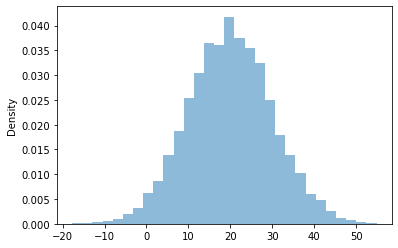

In [10]:
# clear the plot space:
plt.clf()
# Define the probability type of function as uniform (probability space)
P = Normal(mean=20, sd=10)
# Define Y as a random variable of the type P (normal)
Y =RV(P)
# Simulate 10,000 values of Y and save the in the x array: 
y=Y.sim(10000)
y.plot()
plt.show()

# 2.2.5 CHALLENGE

A. Calculate the mean and standard deviation of this random y variable. How similar or different are these values from the mean and standard deviation of the theorical mean (20) and theorical standard deviation (10)?

In [11]:
print('Y')
print(f'Mean: {y.mean()} Std: {y.std()}')
print("Theoretical")
print("Mean: 20, Std: 10")

Y
Mean: 19.98674103651754 Std: 9.991426204311395
Theoretical
Mean: 20, Std: 10


BOTH RESULTS ARE QUITE SIMILAR BECAUSE WE ARE GENERATING THE NORMAL DISTRIBUTION FROM THE SAME VALUES.

B. What do you see? Interpet the histogram with your words.

GIVEN THIS NORMAL DISTRIBUTION, WE CAN OBSERVE THAT THE VALUES ARE CLOSE TO THE PROVIDED MEAN.

In [12]:
# Define the probability space P as a vector of 25 normal random numbers:
P = Normal(mean=20, sd=10) ** 25
# Define RANDOMVECTOR as a vector of 25 random variables in the Probability space P 
RANDOMVECTOR = RV(P)
# Simulate 10,000 random vectors with this distribution and save the in ymatrix: 
ymatrix=RANDOMVECTOR.sim(10000)

Now ymatrix will have 10,000 rows and 25 columns of NORMAL random numbers with mean=20 and SD=10:

In [13]:
ymatrix

0,"(28.64699652720153, 31.245486860260286, 16.609224391565274, 31.108927092072207, -1.0412248977160345,..."
1,"(16.92839506273151, 28.586432379861435, 27.19772892633699, 20.666249900618922, 23.855453993658482, ...."
2,"(22.216044713811044, 21.52132265189058, 4.800175154706443, 12.110132650331941, 11.380740828229367, ...."
3,"(18.905709030612076, 26.948976953864598, 17.558246291131564, 14.824008740469441, 11.823592222743361,..."
4,"(20.328568521389826, 32.030102772181316, 10.457480749692746, 24.135651393694033, 21.8599548508173, ...."
5,"(38.08690057094663, 24.923078995737477, 13.344498779930957, 17.424035065821293, 29.286030009248996, ..."
6,"(24.57909864676494, 21.130541332608956, 11.537806989201844, 28.558116708472653, 30.132742728449898, ..."
7,"(21.354017049428876, 20.917012936954443, 44.599340432309475, 28.10742809880243, 24.569516890897248, ..."
8,"(16.29383838927223, 16.322142750575242, -7.4031325690026115, 24.90637826276904, 11.784414646367923, ..."
...,...
9999,"(17.322683668942858, 14.130479929590049, 20.216062366621237, 23.63386240183548, 13.505303786777084, ..."


Now we get the mean of each vector (row) to get 10,000 sample means:

In [14]:
# The 2nd parameter is the mathematical operation applied to each row of the random vector
# Simulate 10,000 means of each random vector of 25 uniform distributed numbers: 
ymean = RV(P,mean).sim(10000)
ymean

0,23.500381516129927
1,19.38778655417639
2,17.799097362015463
3,23.5463635865374
4,18.601020958170764
5,19.488638118859278
6,20.948335582034748
7,22.92552847684963
8,20.403593497723044
...,...
9999,20.613715309694406


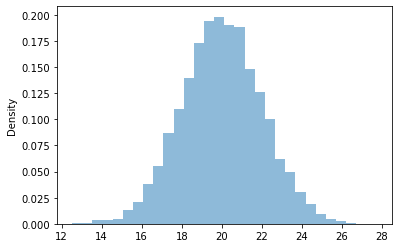

In [15]:
# Now do a histogram of these sample means of Y.
plt.clf()
ymean.plot()
plt.show()

# 2.2.6 CHALLENGE

A. Calculate the mean and the standard deviation of the ymean variable. How similar or different are these values from the mean and standard deviation of y?

In [16]:
print('Y')
print(f'Mean: {y.mean()} Std: {y.std()}')
print('ymean')
print(f'Mean: {ymean.mean()} Std: {ymean.std()}')

Y
Mean: 19.98674103651754 Std: 9.991426204311395
ymean
Mean: 19.989244950845382 Std: 1.9980857241066472


WE CAN CLEARLY REALIZE THAT THERE IS BASICALLY NO DIFFERENCE BETWEEN THE MEAN, THE MAIN DIFFERENCE IS BETWEEN THE STANDARD DEVIATIONS. THIS IS CAUSED BECAUSE OF THE AGGREGATION OF EACH GROUP BY ITS MEAN.

B. Interpret the above histogram of the samples of y.

THE HISTOGRAM REPRESENTS A NORMAL DISTRIBUTION, WHERE THE STANDARD DEVIATION IS SMALLER THAN THE ORIGINAL ONE AND THIS IS CAUSED BECAUSE OF THE GROUPING, WHICH MAKES VALUES TO BE CLOSER TO THE MEAN.

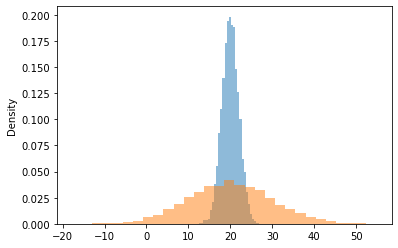

In [17]:
plt.clf()
ymean.plot()
y.plot()
plt.show()

C. What do you see? Compare both histograms, briefly explain what you think that happened.

THE GROUPING IN THE LAST NORMAL DISTRIBUTION CAUSES IT TO HAVE A HIGHER DENSITY AROUND THE MEAN AND LESS SPREAD ACROSS THE X-VALUES. 

# 4.1 CHALLENGE

In [18]:
# Collecting the real data from returns of MSFT from July 2019 until July 2022
MSFT = pdr.get_data_yahoo("MSFT", start = "2017-07-01", end = "2022-06-30", interval = "d")
MSFT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-03,69.599998,68.019997,69.330002,68.169998,16165500.0,63.851704
2017-07-05,69.440002,68.220001,68.260002,69.080002,21176300.0,64.704063
2017-07-06,68.779999,68.120003,68.269997,68.570000,21117600.0,64.226364
2017-07-07,69.839996,68.699997,68.699997,69.459999,16878300.0,65.059982
2017-07-10,70.250000,69.199997,69.459999,69.980003,15014500.0,65.547058
...,...,...,...,...,...,...
2022-06-24,267.980011,261.720001,261.809998,267.700012,33923200.0,267.700012
2022-06-27,268.299988,263.279999,268.209991,264.890015,24615100.0,264.890015
2022-06-28,266.910004,256.320007,263.980011,256.480011,27295500.0,256.480011


In [19]:
# Null: mean of monthly cc <= 0. Alternative mean of monthly return > 0

In [20]:
# Calculating the daily cc returns
MSFT["r"] = (np.log(MSFT["Adj Close"]) - np.log(MSFT["Adj Close"].shift(1)))

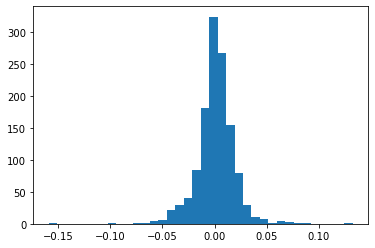

In [21]:
# Plotting the cc returns
plt.hist(MSFT['r'], bins=36)
plt.show()

In [22]:
# We calculate the mean
MSFT_mean = MSFT['r'].mean()
MSFT_mean

0.001107280088342967

In [23]:
# Calculate the std
MSFT_std = MSFT['r'].std()
MSFT_std

0.018531574619870612

In [24]:
# Calculate the grouped std
MSFT_std_grouped = MSFT_std / math.sqrt(60)
MSFT_std_grouped

0.0023924159960586307

In [25]:
# Calculating the t-statistic
t_statistic = (MSFT_mean - 0) / MSFT_std_grouped
t_statistic

0.4628292446494038

In [26]:
# min(95% C.I.)
MIN_CI = MSFT_mean - 2 * (MSFT_std_grouped)
MIN_CI

-0.0036775519037742944

In [27]:
# max(95% C.I.)
MAX_CI = MSFT_mean + 2 * (MSFT_std_grouped)
MAX_CI

0.0058921120804602285

THE RESULT IS THAT THE DIFFERENCE BETWEEN THE TWO MEANS IS 0.46 STANDARD DEVIATIONS. THUS, THE ALTERNATIVE HYPOTHESIS CAN NOT BE CONFIRMED.

In [28]:
# Another way to calculate the grouped std and mean is:
MSFT_month_cc = MSFT.groupby(MSFT.index.strftime('%Y-%m'))['r'].mean()
MSFT_month_cc_mean = MSFT_month_cc.mean()
MSFT_month_cc_std = MSFT_month_cc.std()
print(f'Mean: {MSFT_month_cc_mean}')
print(f'Std:  {MSFT_month_cc_std}')

Mean: 0.0010871478197361701
Std:  0.00273744710484061
